### Stack Exchange hosts sites on a miltitude of fields and subjects, including mathematics, physics, philosophy and data science.
* Stack exchange DS: https://datascience.stackexchange.com/
* Stach exchange DS Query: https://data.stackexchange.com/datascience/query/edit/1248099#resultSets
* Query tutorial: https://data.stackexchange.com/tutorial/intro-to-databases

* What kind of questions are welcome on this site (one of stack exchange)?
    * Computer technology related questions seems more popular.
##  Goal is to find the most popular content.
* Table Posts, Tags, Commnets, Votes look more promising towards finding the most pupular conten.

## Seems relevant towards the goal
* Id: An identification number for the post;
* PostTypeId: An identification number for the type of post
* CreationDate: The date and time of creation of the post.
* Score: The post's score
* ViewCount: How many times the post was viewed
* Tags: What tags were used
* AnswerCount: How many answers the question got (only applicable to quesition posts).
* FavoriteCount: How many times the questions was favored (only applicable to question posts).


SELECT Id, PostTypeId, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount
FROM posts
WHERE (CreationDate >= '2019-01-01 00:00:00') AND (CreationDate < '2020-01-01 00:00:00')
ORDER BY CreationDate DESC;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('2019_questions.csv')
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,43363,2019-01-01 03:53:02,0,30,<machine-learning><nlp>,1,NaN
1,43366,2019-01-01 06:02:07,2,50,<deep-learning><convnet><image-classification>,1,1.0
2,43367,2019-01-01 06:16:26,0,24,<scikit-learn><tensorflow><scipy>,1,NaN
3,43370,2019-01-01 10:06:03,2,36,<classification>,0,NaN
4,43374,2019-01-01 13:18:02,4,32,<deep-learning><time-series><cnn><convolution>,1,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8191 non-null   int64  
 1   CreationDate   8191 non-null   object 
 2   Score          8191 non-null   int64  
 3   ViewCount      8191 non-null   int64  
 4   Tags           8191 non-null   object 
 5   AnswerCount    8191 non-null   int64  
 6   FavoriteCount  1504 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 448.1+ KB


In [4]:
df.FavoriteCount.isna().sum()

6687

In [5]:
df.isna().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    6687
dtype: int64

* There are 7432 missing values in column FavoriteCount, no missing values in other columns.
* For FavoriteCount, replace missing value with 0

* What can we do about the Tags column? Convert to strings separated by ; or ,?
## Set the appropriate types for the columns, clean the Tags column

In [6]:
df.fillna(0, inplace=True)
df.FavoriteCount = df.FavoriteCount.astype('int')

In [7]:
df.CreationDate = df.CreationDate.astype('datetime64[ns]')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8191 non-null   int64         
 1   CreationDate   8191 non-null   datetime64[ns]
 2   Score          8191 non-null   int64         
 3   ViewCount      8191 non-null   int64         
 4   Tags           8191 non-null   object        
 5   AnswerCount    8191 non-null   int64         
 6   FavoriteCount  8191 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 448.1+ KB


In [9]:
df['Tags'] = df.Tags.str.replace('[<>]',' ').str.strip().str.replace(r'\s+',',')

In [10]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,43363,2019-01-01 03:53:02,0,30,"machine-learning,nlp",1,0
1,43366,2019-01-01 06:02:07,2,50,"deep-learning,convnet,image-classification",1,1
2,43367,2019-01-01 06:16:26,0,24,"scikit-learn,tensorflow,scipy",1,0
3,43370,2019-01-01 10:06:03,2,36,classification,0,0
4,43374,2019-01-01 13:18:02,4,32,"deep-learning,time-series,cnn,convolution",1,0


## Determine the most popular tags

In [11]:
# top tags based on quanity count
tags_count = df.groupby('Tags').size().sort_values(ascending = False)

In [12]:
views_count_tag = df.groupby('Tags')['ViewCount'].sum().sort_values(ascending = False)

In [13]:
tags_count_table = pd.DataFrame({"tags_total": tags_count})
views_count_tag_table = pd.DataFrame({"views_total": views_count_tag})

In [14]:
tags_count_table = tags_count_table.merge(views_count_tag_table, left_index=True, right_index=True)


In [15]:
# df.pivot_table(index ='Tags', columns=['ViewCount', 'Tags'])
# df.pivot_table(index = 'Tags', columns='Tags', aggfunc='count')
tags_count_table.sort_values('tags_total', ascending = False).head(10)

,tags_total,views_total
Tags,,
machine-learning,110,16530
"python,pandas",56,140893
python,47,20055
r,38,6405
tensorflow,33,11179
reinforcement-learning,32,3482
nlp,30,3653
neural-network,30,1969
deep-learning,27,2510


In [16]:
tags_count_table.sort_values('views_total', ascending = False).head(10)

,tags_total,views_total
Tags,,
"python,pandas",56,140893
"python,dataframe,csv,data-formats",1,56468
"machine-learning,neural-network,deep-learning,classification,keras",2,50934
"python,pandas,dataframe",21,46723
"data-mining,pandas",1,38660
"scikit-learn,pandas,numpy",1,28969
"machine-learning,python",22,27430
"pandas,dataframe,excel,data.table",1,21404
"python,computer-vision,opencv",3,20643


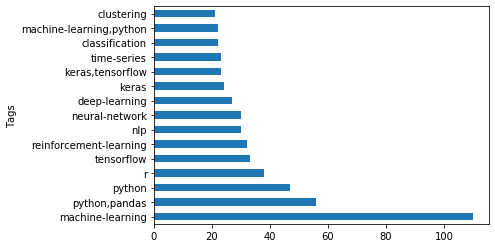

In [17]:
tags_count_table['tags_total'][:15].plot(kind = 'barh')
# Top 15 tags

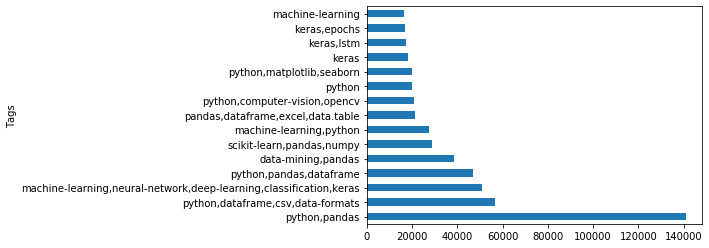

In [18]:
tags_count_table['views_total'].sort_values(ascending = False)[:15].plot(kind = 'barh')
# Top 15 viewed tags

## Count each tag separately

In [19]:
tag_used_count = {}
for tag in df.Tags:
    tag_list = tag.split(',')
    for t in tag_list:
        if t in tag_used_count:
            tag_used_count[t] += 1
        else:
            tag_used_count[t] = 1
tag_used_count

{'machine-learning': 2525,
 'nlp': 460,
 'deep-learning': 1127,
 'convnet': 102,
 'image-classification': 195,
 'scikit-learn': 499,
 'tensorflow': 539,
 'scipy': 39,
 'classification': 642,
 'time-series': 424,
 'cnn': 453,
 'convolution': 92,
 'dataset': 310,
 'dimensionality-reduction': 65,
 'python': 1694,
 'xgboost': 160,
 'neural-network': 994,
 'keras': 866,
 'homework': 4,
 'optimization': 112,
 'theory': 10,
 'sql': 27,
 'fuzzy-logic': 10,
 'evolutionary-algorithms': 10,
 'clustering': 252,
 'reference-request': 16,
 'terminology': 16,
 'gaussian': 18,
 'unbalanced-classes': 38,
 'audio-recognition': 25,
 'lstm': 361,
 'text-generation': 15,
 'categorical-data': 78,
 'predictive-modeling': 252,
 'labels': 28,
 'feature-selection': 194,
 'svm': 128,
 'random-forest': 147,
 'feature-engineering': 153,
 'training': 131,
 'programming': 7,
 'embeddings': 44,
 'deep-network': 28,
 'feature-scaling': 58,
 'data': 195,
 'churn': 14,
 'accuracy': 86,
 'pandas': 342,
 'r': 252,
 'bigda

In [20]:
df_tags_viewCount = df [['ViewCount', 'Tags']].copy()
df_tags_viewCount.head()

,ViewCount,Tags
0,30,"machine-learning,nlp"
1,50,"deep-learning,convnet,image-classification"
2,24,"scikit-learn,tensorflow,scipy"
3,36,classification
4,32,"deep-learning,time-series,cnn,convolution"


In [21]:
df_tags = pd.DataFrame(list(tag_used_count.items()), columns = ['tag', 'used_count'])
#Convert a dict to dataframe
df_tags.sort_values('used_count', ascending = False)

,tag,used_count
0,machine-learning,2525
14,python,1694
2,deep-learning,1127
16,neural-network,994
17,keras,866
...,...,...
467,wikipedia,1
471,statsmodels,1
472,sap,1
473,galago,1


In [22]:
tags_split_count = pd.concat([pd.Series(row['ViewCount'], index=row['Tags'].split(',')) for _, row in 
                             df_tags_viewCount.iterrows()]).reset_index()
tags_split_count

,index,0
0,machine-learning,30
1,nlp,30
2,deep-learning,50
3,convnet,50
4,image-classification,50
...,...,...
24755,bayesian,27
24756,deep-learning,60
24757,hyperparameter,60
24758,hyperparameter-tuning,60


In [23]:
tags_split_count.columns = ['tag', 'view_count']
tags_split_count.head()

,tag,view_count
0,machine-learning,30
1,nlp,30
2,deep-learning,50
3,convnet,50
4,image-classification,50


In [24]:
tags_count_pivot = tags_split_count.pivot_table(index= 'tag', values=['tag', 'view_count'], 
                             aggfunc={'tag':'count', 'view_count':np.sum})
tags_count_pivot.rename(columns={'tag':'tag_used'}, inplace=True)
#tags_count_pivot.reset_index(inplace=True)
tags_count_pivot = tags_count_pivot.sort_values('tag_used', ascending=False)

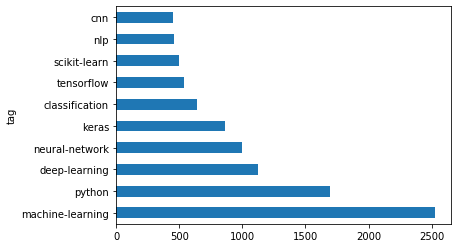

In [25]:
tags_count_pivot.tag_used.head(10).plot(kind = 'barh')

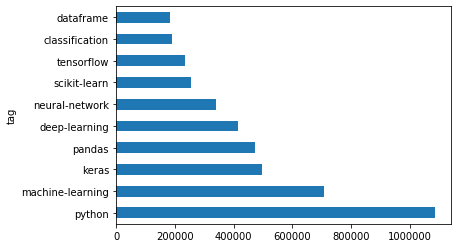

In [26]:
tags_count_pivot.sort_values('view_count', ascending=False)['view_count'].head(10).plot(kind = 'barh')

In [27]:
# most_used -- how many times each of the top 20 tags was used
most_used = tags_count_pivot[:20].sort_values('tag_used')
# most_views -- how many times each of the top 20 tags was viewed
most_viewed = tags_count_pivot.sort_values('view_count')[-20:]

* What tags are in most_used but not in most_viewed
* machine-learning-model, statistics, predictive-modeling and r

In [28]:
most_used.head()

,tag_used,view_count
tag,,
machine-learning-model,212,42587
statistics,216,30111
predictive-modeling,252,27032
clustering,252,61564
r,252,64537


In [29]:
in_used = pd.merge(most_used, most_viewed, how = 'left', left_index = True, right_index = True)
in_used

,tag_used_x,view_count_x,tag_used_y,view_count_y
tag,,,,
machine-learning-model,212,42587,NaN,NaN
statistics,216,30111,NaN,NaN
predictive-modeling,252,27032,NaN,NaN
clustering,252,61564,NaN,NaN
r,252,64537,NaN,NaN
dataset,310,76406,310.0,76406.0
regression,323,87041,323.0,87041.0
pandas,342,472000,342.0,472000.0
lstm,361,132026,361.0,132026.0


* What tags are in the most_viewed, but not most_used
* csv, pytorch and dataframe

In [30]:
pd.merge(most_used, most_viewed, how = 'right', left_index=True, right_index=True)

,tag_used_x,view_count_x,tag_used_y,view_count_y
tag,,,,
data-mining,NaN,NaN,200,67299
dataset,310.0,76406.0,310,76406
pytorch,NaN,NaN,162,80292
csv,NaN,NaN,24,80660
regression,323.0,87041.0,323,87041
numpy,NaN,NaN,110,104927
time-series,424.0,120000.0,424,120000
lstm,361.0,132026.0,361,132026
cnn,453.0,137123.0,453,137123


Some tags also stand out as being related. For example, python is related to pandas, as we can find both pythons and pandas in the same country — or better yet, because pandas is a Python library. So by writing about pandas, we can actually simultaneously tackle two tags.

In [31]:
df[df.Tags.apply(lambda tag: True if 'r' in tag.split(',') and 'pandas' in tag.split(',') else False)]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2008,49148,2019-04-11 19:41:39,1,117,"r,data-mining,pandas,matlab,databases",3,0
5734,60074,2019-09-11 20:35:17,0,72,"r,pandas,dplyr",0,0


Just two results. You can look at these questions by replacing ID in https://datascience.stackexchange.com/questions/ID with the questions' Ids values and see what they are about.

### From the top 10 tags of each, tags in common: python, machine-learning, deep-learning, neural-network, keras, tensorflow, classification, scikit-learn.
* They are realted to machine learning

# Question: Is deep learning just a fad? Could interest in deep learning be slowing down?
## * Count how many deep learning questions are asked per time period
## * The total amount of questions per time period
## * How many deep learning questions there are relative to the total amount of questions per time period

In [32]:
all_questions = pd.read_csv('all_questions.csv')
all_questions.head()

,Id,CreationDate,Tags
0,52137,2019-05-17 21:54:15,<python><keras><prediction><evaluation>
1,52142,2019-05-17 23:11:13,<deep-learning><overfitting><regularization>
2,52144,2019-05-18 01:08:28,<machine-learning><neural-network>
3,52155,2019-05-18 11:03:04,<machine-learning><deep-learning><cnn>
4,52157,2019-05-18 13:13:32,<machine-learning><cost-function>


In [33]:
all_questions.CreationDate = all_questions.CreationDate.astype('datetime64[ns]')
all_questions.Tags = all_questions.Tags.str.replace('[<>]', ' ').str.strip().str.replace(r'\s+',',')
all_questions.head()

,Id,CreationDate,Tags
0,52137,2019-05-17 21:54:15,"python,keras,prediction,evaluation"
1,52142,2019-05-17 23:11:13,"deep-learning,overfitting,regularization"
2,52144,2019-05-18 01:08:28,"machine-learning,neural-network"
3,52155,2019-05-18 11:03:04,"machine-learning,deep-learning,cnn"
4,52157,2019-05-18 13:13:32,"machine-learning,cost-function"


* Find questions that related to deep-learning

In [34]:
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24363 entries, 0 to 24362
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            24363 non-null  int64         
 1   CreationDate  24363 non-null  datetime64[ns]
 2   Tags          24363 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 571.1+ KB


In [35]:
all_questions['DeepLearning'] = all_questions.Tags.apply(lambda x : 1 if 'deep-learning' in x else 0)
all_questions.head()

,Id,CreationDate,Tags,DeepLearning
0,52137,2019-05-17 21:54:15,"python,keras,prediction,evaluation",0
1,52142,2019-05-17 23:11:13,"deep-learning,overfitting,regularization",1
2,52144,2019-05-18 01:08:28,"machine-learning,neural-network",0
3,52155,2019-05-18 11:03:04,"machine-learning,deep-learning,cnn",1
4,52157,2019-05-18 13:13:32,"machine-learning,cost-function",0


In [36]:
all_questions.DeepLearning.sum()

3164

In [37]:
all_questions.CreationDate = all_questions.CreationDate.dt.strftime("%Y%m")
all_questions.head()

,Id,CreationDate,Tags,DeepLearning
0,52137,201905,"python,keras,prediction,evaluation",0
1,52142,201905,"deep-learning,overfitting,regularization",1
2,52144,201905,"machine-learning,neural-network",0
3,52155,201905,"machine-learning,deep-learning,cnn",1
4,52157,201905,"machine-learning,cost-function",0


In [38]:
# Total questions per period, and questions related to deep learning

all_questions.pivot_table(index = 'CreationDate', values=['DeepLearning'], aggfunc=np.sum)

,DeepLearning
CreationDate,
201405,0
201406,1
201407,1
201408,0
201409,0
...,...
202001,103
202002,89
202003,78


In [39]:
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24363 entries, 0 to 24362
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            24363 non-null  int64 
 1   CreationDate  24363 non-null  object
 2   Tags          24363 non-null  object
 3   DeepLearning  24363 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 761.5+ KB


In [40]:
deep_count = all_questions[['CreationDate', 'DeepLearning']].pivot_table(index = 'CreationDate',
                                                           values = ['CreationDate', 'DeepLearning'],
                                                           aggfunc = {'CreationDate':'count',
                                                                     'DeepLearning':np.sum})
deep_count.rename(columns = {'CreationDate':'TotalCount'}, inplace = True)
deep_count

,TotalCount,DeepLearning
CreationDate,,
201405,58,0
201406,99,1
201407,76,1
201408,65,0
201409,48,0
...,...,...
202001,743,103
202002,673,89
202003,703,78


In [41]:
deep_count['DeepLearningRate'] = deep_count.DeepLearning / deep_count.TotalCount
deep_count

,TotalCount,DeepLearning,DeepLearningRate
CreationDate,,,
201405,58,0,0.000000
201406,99,1,0.010101
201407,76,1,0.013158
201408,65,0,0.000000
201409,48,0,0.000000
...,...,...,...
202001,743,103,0.138627
202002,673,89,0.132244
202003,703,78,0.110953


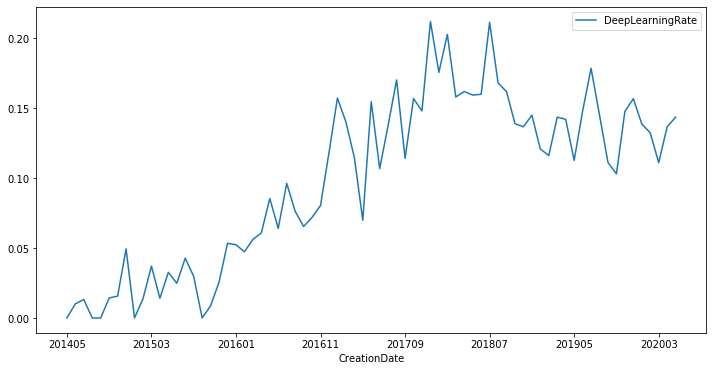

In [42]:
deep_count.plot(y = 'DeepLearningRate',figsize=(12,6))

* Write your observations and final recommendation in a markdown cell.

Our work allowed us to conclude that deep learning is the most popular topic right now. Here are some things to consider:

    What other content can we recommend that isn't as popular? You can try using association rules to find strong relations between tags.
    What other popularity features could we include in our analysis? Perhaps scores and favourite counts?
    We focused on other DSSE. How could we use other related sites to help us with our goal?
    How can we leverage other sites to determine what non-data-science content to write about? For example, is there some mathematical field that leads to more questions than others?

We encourage you to think of other questions and share your work with us!

Curious to see what other students have done on this project? Head over to our Community to check them out. While you are there, please remember to show some love and give your own feedback!

And of course, we welcome you to share your own project and show off your hard work. Head over to our Community to share your finished Guided Project!

In [43]:
all_questions.head()

,Id,CreationDate,Tags,DeepLearning
0,52137,201905,"python,keras,prediction,evaluation",0
1,52142,201905,"deep-learning,overfitting,regularization",1
2,52144,201905,"machine-learning,neural-network",0
3,52155,201905,"machine-learning,deep-learning,cnn",1
4,52157,201905,"machine-learning,cost-function",0


In [71]:
all_questions.pivot_table(index = 'CreationDate',
                         values=['DeepLearning'], 
                         aggfunc=[np.sum, len], margins=True)

,sum,len
,DeepLearning,DeepLearning
CreationDate,,
201405,0,58
201406,1,99
201407,1,76
201408,0,65
201409,0,48
...,...,...
202002,89,673
202003,78,703


In [45]:
all_questions[['CreationDate', 'DeepLearning']].pivot_table(index = 'CreationDate',
                                                           values = ['CreationDate', 'DeepLearning'],
                                                           aggfunc = {'CreationDate':'count',
                                                                     'DeepLearning':np.sum})

,CreationDate,DeepLearning
CreationDate,,
201405,58,0
201406,99,1
201407,76,1
201408,65,0
201409,48,0
...,...,...
202001,743,103
202002,673,89
202003,703,78


# Pivot table

In [46]:
df = pd.read_excel('sales-funnel.xlsx')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [48]:
df.Status = df.Status.astype('category')
df.Status.cat.set_categories(['won', 'pending', 'presented','declined'], inplace = True)
df

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Account   17 non-null     int64   
 1   Name      17 non-null     object  
 2   Rep       17 non-null     object  
 3   Manager   17 non-null     object  
 4   Product   17 non-null     object  
 5   Quantity  17 non-null     int64   
 6   Price     17 non-null     int64   
 7   Status    17 non-null     category
dtypes: category(1), int64(3), object(4)
memory usage: 1.3+ KB


In [50]:
pd.pivot_table(df, index = ['Name'])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [51]:
df.pivot_table(index = ['Name', 'Rep', 'Manager'])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [52]:
df.pivot_table(index = ['Manager', 'Rep'])

Account         Price  Quantity
Manager       Rep                                            
Debra Henley  Craig Booker   720237.0  20000.000000  1.250000
              Daniel Hilton  194874.0  38333.333333  1.666667
              John Smith     576220.0  20000.000000  1.500000
Fred Anderson Cedric Moss    196016.5  27500.000000  1.250000
              Wendy Yule     614061.5  44250.000000  3.000000

In [53]:
df.pivot_table(index = ['Manager', 'Rep'], values = ['Price'])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [61]:
df.pivot_table(index = ['Manager', 'Rep'], values = ['Price'], aggfunc=['mean', np.sum, len])
# Just use column 'Price' for aggregation

mean     sum   len
                                    Price   Price Price
Manager       Rep                                      
Debra Henley  Craig Booker   20000.000000   80000     4
              Daniel Hilton  38333.333333  115000     3
              John Smith     20000.000000   40000     2
Fred Anderson Cedric Moss    27500.000000  110000     4
              Wendy Yule     44250.000000  177000     4

In [57]:
all_questions.head()

,Id,CreationDate,Tags,DeepLearning
0,52137,201905,"python,keras,prediction,evaluation",0
1,52142,201905,"deep-learning,overfitting,regularization",1
2,52144,201905,"machine-learning,neural-network",0
3,52155,201905,"machine-learning,deep-learning,cnn",1
4,52157,201905,"machine-learning,cost-function",0


In [60]:
all_questions.pivot_table(index = 'CreationDate', values = ['DeepLearning'], aggfunc=[np.sum, len]).tail()

,sum,len
,DeepLearning,DeepLearning
CreationDate,,
202001,103,743
202002,89,673
202003,78,703
202004,115,842
202005,137,955


## Columns vs. Values
* Columns are optional - they provide an additional way to segment the actual values you care about. The aggregation functions are applied to the values you list.

In [64]:
df.pivot_table(index = ['Manager', 'Rep'], values = ['Price'], columns = ['Product'], aggfunc=[np.sum],
              fill_value=0)

sum                             
                              Price                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

In [63]:
df.pivot_table(index = ['Manager', 'Rep'], values = ['Price'], aggfunc=[np.sum])

sum
                              Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [65]:
df.pivot_table(index = ['Manager', 'Rep'], values = ['Price', 'Quantity'], columns = ['Product'],
              aggfunc=[np.sum], fill_value = 0)

sum                                        \
                              Price                              Quantity   
Product                         CPU Maintenance Monitor Software      CPU   
Manager       Rep                                                           
Debra Henley  Craig Booker    65000        5000       0    10000        2   
              Daniel Hilton  105000           0       0    10000        4   
              John Smith      35000        5000       0        0        1   
Fred Anderson Cedric Moss     95000        5000       0    10000        3   
              Wendy Yule     165000        7000    5000        0        7   

                                                          
                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker            2       0        1  
              Daniel Hilton           0       0        1  
              John Smith              2       0        0  
Fred Anderson Cedric Moss             1       0        1  
              Wendy Yule              3       2        0

* Remove Product from the columns and add to the index .

In [66]:
df.pivot_table(index = ['Manager', 'Rep', 'Product'], values = ['Price', 'Quantity'],
              aggfunc=[np.sum], fill_value = 0)

sum         
                                          Price Quantity
Manager       Rep           Product                     
Debra Henley  Craig Booker  CPU           65000        2
                            Maintenance    5000        2
                            Software      10000        1
              Daniel Hilton CPU          105000        4
                            Software      10000        1
              John Smith    CPU           35000        1
                            Maintenance    5000        2
Fred Anderson Cedric Moss   CPU           95000        3
                            Maintenance    5000        1
                            Software      10000        1
              Wendy Yule    CPU          165000        7
                            Maintenance    7000        3
                            Monitor        5000        2

* Want to see some totals

In [67]:
df.pivot_table(index = ['Manager', 'Rep', 'Product'], values = ['Price', 'Quantity'],
              aggfunc=[np.sum, np.mean], fill_value=0, margins=True)

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

* Let’s move the analysis up a level and look at our pipeline at the manager level. Notice how the status is ordered based on our earlier category definition.

In [68]:
df.pivot_table(index = ['Manager', 'Status'], values = ['Price'], 
              aggfunc=[np.sum], fill_value=0, margins=True)

sum
                          Price
Manager       Status           
Debra Henley  won         65000
              pending     50000
              presented   50000
              declined    70000
Fred Anderson won        172000
              pending      5000
              presented   45000
              declined    65000
All                      522000

* A really handy feature is the ability to pass a dictionary to the aggfunc so you can perform different functions on each of the values you select. This has a side-effect of making the labels a little cleaner.

In [72]:
df.pivot_table(index = ['Manager', 'Status'], columns=['Product'], values = ['Quantity', 'Price'],
              aggfunc={'Quantity':len, 'Price':np.sum}, fill_value=0)

Price                              Quantity  \
Product                     CPU Maintenance Monitor Software      CPU   
Manager       Status                                                    
Debra Henley  won         65000           0       0        0        1   
              pending     40000       10000       0        0        1   
              presented   30000           0       0    20000        1   
              declined    70000           0       0        0        2   
Fred Anderson won        165000        7000       0        0        2   
              pending         0        5000       0        0        0   
              presented   30000           0    5000    10000        1   
              declined    65000           0       0        0        1   

                                                      
Product                 Maintenance Monitor Software  
Manager       Status                                  
Debra Henley  won                 0       0        0  
              pending             2       0        0  
              presented           0       0        2  
              declined            0       0        0  
Fred Anderson won                 1       0        0  
              pending             1       0        0  
              presented           0       1        1  
              declined            0       0        0

In [73]:
df.pivot_table(index = ['Manager', 'Status'], columns=['Product'], values=['Quantity', 'Price'],
              aggfunc={'Quantity':len, 'Price':[np.sum, np.mean]}, fill_value=0)

Price                                       \
                          mean                                  sum   
Product                    CPU Maintenance Monitor Software     CPU   
Manager       Status                                                  
Debra Henley  won        65000           0       0        0   65000   
              pending    40000        5000       0        0   40000   
              presented  30000           0       0    10000   30000   
              declined   35000           0       0        0   70000   
Fred Anderson won        82500        7000       0        0  165000   
              pending        0        5000       0        0       0   
              presented  30000           0    5000    10000   30000   
              declined   65000           0       0        0   65000   

                                                     Quantity              \
                                                          len               
Product                 Maintenance Monitor Software      CPU Maintenance   
Manager       Status                                                        
Debra Henley  won                 0       0        0        1           0   
              pending         10000       0        0        1           2   
              presented           0       0    20000        1           0   
              declined            0       0        0        2           0   
Fred Anderson won              7000       0        0        2           1   
              pending          5000       0        0        0           1   
              presented           0    5000    10000        1           0   
              declined            0       0        0        1           0   

                                          
                                          
Product                 Monitor Software  
Manager       Status                      
Debra Henley  won             0        0  
              pending         0        0  
              presented       0        2  
              declined        0        0  
Fred Anderson won             0        0  
              pending         0        0  
              presented       1        1  
              declined        0        0

In [74]:
df.pivot_table(index = ['Manager', 'Status'], columns=['Product'], values = ['Price'],
              aggfunc=[np.sum, len], fill_value=0)

sum                                len  \
                          Price                              Price   
Product                     CPU Maintenance Monitor Software   CPU   
Manager       Status                                                 
Debra Henley  won         65000           0       0        0     1   
              pending     40000       10000       0        0     1   
              presented   30000           0       0    20000     1   
              declined    70000           0       0        0     2   
Fred Anderson won        165000        7000       0        0     2   
              pending         0        5000       0        0     0   
              presented   30000           0    5000    10000     1   
              declined    65000           0       0        0     1   

                                                      
                                                      
Product                 Maintenance Monitor Software  
Manager       Status                                  
Debra Henley  won                 0       0        0  
              pending             2       0        0  
              presented           0       0        2  
              declined            0       0        0  
Fred Anderson won                 1       0        0  
              pending             1       0        0  
              presented           0       1        1  
              declined            0       0        0

### Reference:
https://pbpython.com/pandas-pivot-table-explained.html